In [20]:
#Make necessary imports

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [2]:
#Read in datasets

train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test-full.csv")
submission_example = pd.read_csv("data/full_submission.csv")

In [3]:
train_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,242642,2881,130,22,210,54,1020,250,221,88,...,0,0,0,0,0,0,0,0,0,1
1,309891,3005,351,14,242,-16,1371,194,215,159,...,0,0,0,0,0,0,0,0,0,1
2,287847,3226,63,14,618,2,1092,232,210,107,...,0,0,0,0,0,0,0,0,0,1
3,516307,3298,317,8,661,60,752,198,233,174,...,0,0,0,0,0,0,0,0,0,1
4,124860,3080,35,6,175,26,3705,219,227,144,...,0,0,0,0,0,0,0,0,0,1


In [4]:
test_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,0
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,0
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,0
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,0
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(train_data.shape)
print(test_data.shape)
print(submission_example.shape)

(15120, 56)
(581012, 55)
(581012, 2)


In [6]:
submission_example.head()

,Id,Cover_Type
0,1,5
1,2,5
2,3,5
3,4,4
4,5,5


In [7]:
train_data.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

array([[<AxesSubplot:title={'center':'Elevation'}>,
        <AxesSubplot:title={'center':'Aspect'}>],
       [<AxesSubplot:title={'center':'Horizontal_Distance_To_Fire_Points'}>,
        <AxesSubplot:>]], dtype=object)

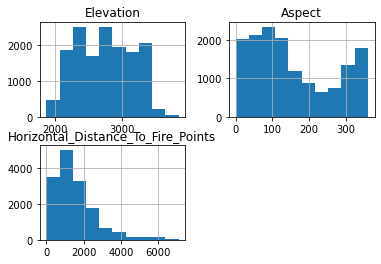

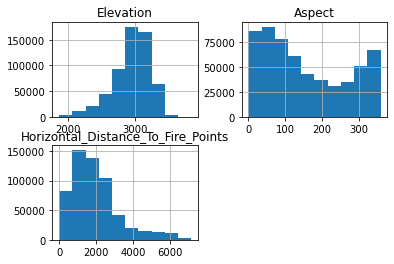

In [8]:
#Choose columns to see a histogram of the distribution

cols = ['Elevation','Aspect','Horizontal_Distance_To_Fire_Points']
train_data[cols].hist()
test_data[cols].hist()

array([[<AxesSubplot:title={'center':'Elevation'}>,
        <AxesSubplot:title={'center':'Aspect'}>],
       [<AxesSubplot:title={'center':'Horizontal_Distance_To_Fire_Points'}>,
        <AxesSubplot:>]], dtype=object)

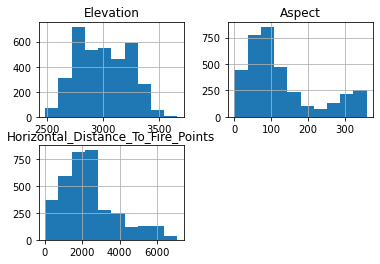

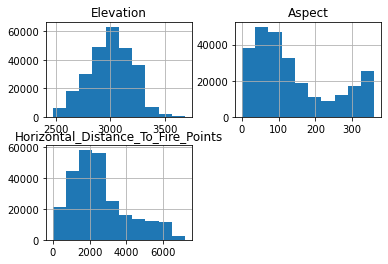

In [9]:
#Or filtered distribution based on one area

train_data[train_data["Wilderness_Area1"]==1][cols].hist()
test_data[test_data["Wilderness_Area1"]==1][cols].hist()

In [10]:
soil_types = ["Soil_Type" + str(i) for i in range(1,41)]
soils = test_data[soil_types]

In [11]:
soils.shape[0] == soils.sum().sum()

True

In [63]:
norm_train = StandardScaler().fit_transform(train_data.drop(columns=['Id', 'Cover_Type']))
norm_test = StandardScaler().fit_transform(test_data.drop(columns=['Id']))

In [64]:
pca1 = PCA(n_components=50)
pca_train = pca1.fit_transform(norm_train)

In [58]:
pca2 = PCA(n_components=30)
pca_test = pca2.fit_transform(norm_test)

In [65]:
pca1.explained_variance_ratio_

array([0.08075539, 0.05679316, 0.0448386 , 0.03786757, 0.03013732,
       0.02613625, 0.02205148, 0.02175329, 0.0216077 , 0.02009288,
       0.02002373, 0.0198532 , 0.01977689, 0.01975557, 0.01963692,
       0.01956679, 0.01950505, 0.01941901, 0.01936002, 0.01932531,
       0.01925512, 0.01920686, 0.01918478, 0.01911506, 0.0190629 ,
       0.01904261, 0.01900341, 0.01897499, 0.01897228, 0.01895094,
       0.01892556, 0.0189068 , 0.01889362, 0.01889126, 0.01888841,
       0.01887919, 0.01887408, 0.01886971, 0.01778547, 0.01530287,
       0.01324903, 0.01131077, 0.00944048, 0.00751725, 0.00686166,
       0.00595172, 0.00488879, 0.00389674, 0.00247767, 0.00111681])

In [60]:
pca2.explained_variance_ratio_

array([0.06851469, 0.0540848 , 0.04440956, 0.03709034, 0.0281563 ,
       0.0270444 , 0.02261243, 0.02155961, 0.02040213, 0.0200569 ,
       0.0198406 , 0.01969887, 0.01948512, 0.01912303, 0.01910502,
       0.01909148, 0.01897539, 0.0189119 , 0.018878  , 0.01877488,
       0.01876155, 0.01870845, 0.01868701, 0.01865064, 0.01862836,
       0.01861965, 0.01860301, 0.01858474, 0.01857502, 0.01856999])

In [66]:
cumulative = np.cumsum(pca1.explained_variance_ratio_)

Text(0.5, 1.0, 'Cumulative explained variance per principal component')

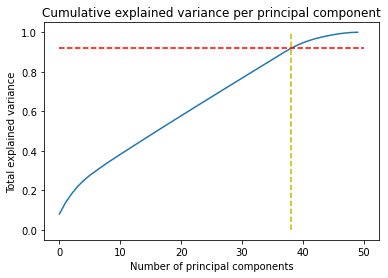

In [67]:
plt.plot(cumulative)
plt.hlines(0.92, 0, 50, linestyles='--', color='r')
plt.vlines(38, 0, 1, linestyles='--', color='y')
plt.xlabel("Number of principal components")
plt.ylabel("Total explained variance")
plt.title("Cumulative explained variance per principal component")